##  Model development Pipeline.

This notebook presents the entire development process of the Multiclass Model of Mineral Species Classification.
It contains:


* Exploratory data analysis
* Preprocessing and resampling
* Algorithm evaluation and benchmarking
* Optimization
* Calibration 
* Final validation
 



#### Clasification function is given by; X = (1243 x 45 numerical features), y = 18 classes


---

In [1]:
import pandas as pd
import numpy as np
from pycaret.classification import * # Machine learning tools
import imblearn  # Resampling
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import CondensedNearestNeighbour 
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.metrics import ConfusionMatrixDisplay # Model evaluation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns
from sklearn.metrics import classification_report # Model evaluation report
from ipywidgets import widgets # Interactive functions

#### Performing basic data exploratory analysis

In [2]:
df1 = pd.read_excel('./DATA/MACLAS_DATASET.xlsx',sheet_name='training', engine='openpyxl')
#df1 = df1.drop_duplicates(subset='Name')
df1.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 56 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             1243 non-null   int64  
 1   Name              1243 non-null   object 
 2   XRD_MIN_          1243 non-null   object 
 3   XRD_MIN_2         196 non-null    object 
 4   XRD_MIN_3         51 non-null     object 
 5   XRD_MIN_4         4 non-null      object 
 6   target            1243 non-null   object 
 7   Strunz            1243 non-null   object 
 8   Variscite_Binary  1158 non-null   float64
 9   Duration          1237 non-null   float64
 10  Mg                1243 non-null   float64
 11  Al                1243 non-null   float64
 12  Si                1243 non-null   float64
 13  P                 1243 non-null   float64
 14  S                 1243 non-null   float64
 15  Cl                1243 non-null   float64
 16  K                 1243 non-null   float64


In [3]:
#Filtering contextual data
df = df1.iloc[:, 10:]
df = df.drop(['suma'], axis= 1)
df['target'] = df1['target']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 46 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mg      1243 non-null   float64
 1   Al      1243 non-null   float64
 2   Si      1243 non-null   float64
 3   P       1243 non-null   float64
 4   S       1243 non-null   float64
 5   Cl      1243 non-null   float64
 6   K       1243 non-null   float64
 7   Ca      1243 non-null   float64
 8   Sc      1243 non-null   float64
 9   Ti      1243 non-null   float64
 10  V       1243 non-null   float64
 11  Cr      1243 non-null   float64
 12  Mn      1243 non-null   float64
 13  Fe      1243 non-null   float64
 14  Co      1243 non-null   float64
 15  Ni      1243 non-null   float64
 16  Cu      1243 non-null   float64
 17  Zn      1243 non-null   float64
 18  Ga      1243 non-null   float64
 19  Ge      1243 non-null   float64
 20  As      1243 non-null   float64
 21  Se      1243 non-null   float64
 22  

#### Checking that there are no missing values in the data

In [5]:
df.isnull().any().any()

False

#### Exploring target distribution

In [6]:
target = df['target'].value_counts()
target

Variscite              781
Muscovite               68
Clinochlore             53
Talc                    41
Aheylite                35
Chlorite-serpentine     35
Calcite                 28
Berlinite               25
Crandallite             23
Planerite               18
Strengite               12
Annabergite             11
Metavariscite            9
Aragonite                8
Fluorite                 8
Quartz                   7
Turquoise                7
Illite                   7
Volkonskoite             6
Phosphosiderite          5
Ankerite                 4
Alunite                  3
Goethite                 3
Braunite                 3
Phlogopite               3
Nimite                   2
Fluellite                2
Satterlyite              2
Montgomeryite            2
Dickite                  2
Dolomite                 2
Magnesiochloritoid       2
Nontronite               2
Chrysotile               2
Kaolinite                2
Pyrophyllite             2
Paranatrolite            2
O

### Preprocess:

We have established a minimum number of seven cases per class in order to keep the label within the  training data, below this threshold we have had a lot of problems with the resampling strategies. A lower number leads to a resampling with very homogeneous samples which in the end leads to a high risk of overfitting.

In [7]:
# Case deletion for classes < 7
casos = target[target <7]
values = casos.index
values
deleted_cases= df[df["target"].isin(values)]
case_del = deleted_cases.index
df.drop(case_del, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 0 to 1242
Data columns (total 46 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mg      1176 non-null   float64
 1   Al      1176 non-null   float64
 2   Si      1176 non-null   float64
 3   P       1176 non-null   float64
 4   S       1176 non-null   float64
 5   Cl      1176 non-null   float64
 6   K       1176 non-null   float64
 7   Ca      1176 non-null   float64
 8   Sc      1176 non-null   float64
 9   Ti      1176 non-null   float64
 10  V       1176 non-null   float64
 11  Cr      1176 non-null   float64
 12  Mn      1176 non-null   float64
 13  Fe      1176 non-null   float64
 14  Co      1176 non-null   float64
 15  Ni      1176 non-null   float64
 16  Cu      1176 non-null   float64
 17  Zn      1176 non-null   float64
 18  Ga      1176 non-null   float64
 19  Ge      1176 non-null   float64
 20  As      1176 non-null   float64
 21  Se      1176 non-null   float64
 22  

### Target distribution after class deletion

In [9]:
target = df['target'].value_counts()
target

Variscite              781
Muscovite               68
Clinochlore             53
Talc                    41
Chlorite-serpentine     35
Aheylite                35
Calcite                 28
Berlinite               25
Crandallite             23
Planerite               18
Strengite               12
Annabergite             11
Metavariscite            9
Aragonite                8
Fluorite                 8
Illite                   7
Turquoise                7
Quartz                   7
Name: target, dtype: int64

#### Creating Validation Set 1 (VS1) (10%)
```
Note that these data have not been resampled.```

In [10]:
# Validation set 1 (VS1)
data = df.sample(frac=0.90, random_state=786)
vs1 = df.drop(data.index)
data.reset_index(inplace=True, drop=True)
vs1.reset_index(inplace=True, drop=True)
print('Data for further procedures: ' + str(data.shape))
print('Data for final validation: ' + str(vs1.shape))
#vs1.to_csv('./TABLES/validation_set1.csv')

Data for further procedures: (1058, 46)
Data for final validation: (118, 46)


#### Creating our Classification function:

the same pipeline has been used to aim at different targets. In this [notebook](./Strunz_Model_development.ipynb) you will find the model for classifying major groups.

In [11]:
X = df.drop(['target'], axis=1)
y = df['target']

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 0 to 1242
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mg      1176 non-null   float64
 1   Al      1176 non-null   float64
 2   Si      1176 non-null   float64
 3   P       1176 non-null   float64
 4   S       1176 non-null   float64
 5   Cl      1176 non-null   float64
 6   K       1176 non-null   float64
 7   Ca      1176 non-null   float64
 8   Sc      1176 non-null   float64
 9   Ti      1176 non-null   float64
 10  V       1176 non-null   float64
 11  Cr      1176 non-null   float64
 12  Mn      1176 non-null   float64
 13  Fe      1176 non-null   float64
 14  Co      1176 non-null   float64
 15  Ni      1176 non-null   float64
 16  Cu      1176 non-null   float64
 17  Zn      1176 non-null   float64
 18  Ga      1176 non-null   float64
 19  Ge      1176 non-null   float64
 20  As      1176 non-null   float64
 21  Se      1176 non-null   float64
 22  

####  Handling Imbalance (Subsampling Majority Class)
We used [The Condensed Nearest Neighbour Rule](https://ieeexplore.ieee.org/document/1054155) to keep only non-redundant data on majority class "Variscite".

Setting a number of 5 neighbors has proven to be optimal in eliminating redundant cases.

```Note that the resulting sub-sampled set contains only 252 Variscite data points. This number can be controlled by the n_seeds_S parameter.``` 

Variscite              252
Muscovite               68
Clinochlore             53
Talc                    41
Chlorite-serpentine     35
Aheylite                35
Calcite                 28
Berlinite               25
Crandallite             23
Planerite               18
Strengite               12
Annabergite             11
Metavariscite            9
Fluorite                 8
Aragonite                8
Quartz                   7
Turquoise                7
Illite                   7
Name: target, dtype: int64

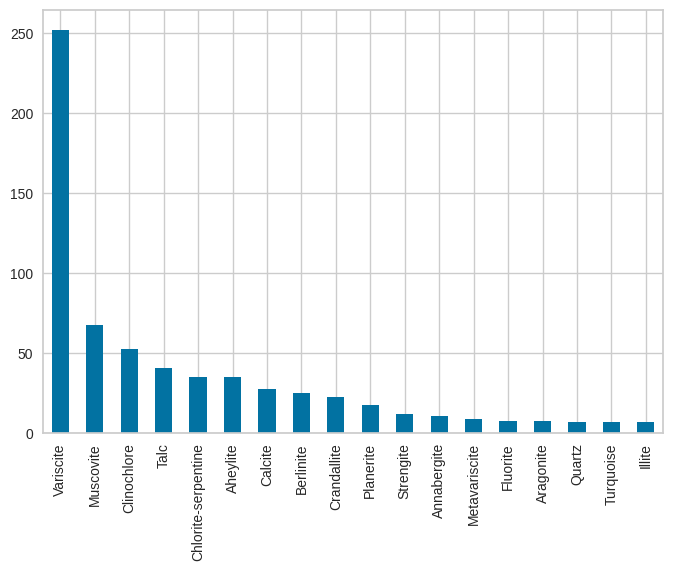

In [13]:
undersample = CondensedNearestNeighbour(sampling_strategy=['Variscite'], n_neighbors=5, n_seeds_S= 250, random_state=123)
X_cnn, y_cnn = undersample.fit_resample(X, y)
y_cnn.value_counts().plot(kind='bar')
y_cnn.value_counts()

#### Data augmentation of minority classes
We carry out the Synthetic Minority Oversampling Technique (SMOTE)

Aheylite               252
Annabergite            252
Turquoise              252
Talc                   252
Strengite              252
Quartz                 252
Planerite              252
Muscovite              252
Metavariscite          252
Illite                 252
Fluorite               252
Crandallite            252
Clinochlore            252
Chlorite-serpentine    252
Calcite                252
Berlinite              252
Aragonite              252
Variscite              252
Name: target, dtype: int64

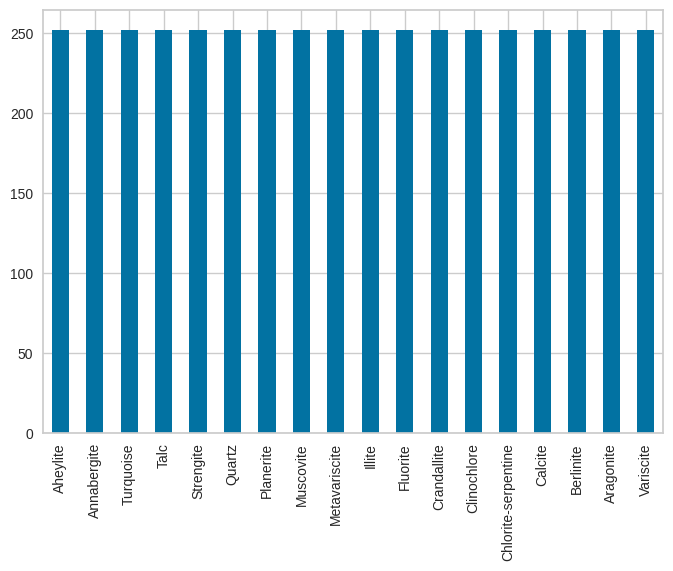

In [14]:
# oversampling strategy
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_cnn, y_cnn)

y_smote.value_counts().plot(kind='bar')
y_smote.value_counts()

#### We have created a balanced data set with 252 cases per class.

In [15]:
# Creating final resampled dataset
smote_data = X_smote
smote_data['target'] = y_smote

In [16]:
# Final dataset shape after resampling
smote_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4536 entries, 0 to 4535
Data columns (total 46 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mg      4536 non-null   float64
 1   Al      4536 non-null   float64
 2   Si      4536 non-null   float64
 3   P       4536 non-null   float64
 4   S       4536 non-null   float64
 5   Cl      4536 non-null   float64
 6   K       4536 non-null   float64
 7   Ca      4536 non-null   float64
 8   Sc      4536 non-null   float64
 9   Ti      4536 non-null   float64
 10  V       4536 non-null   float64
 11  Cr      4536 non-null   float64
 12  Mn      4536 non-null   float64
 13  Fe      4536 non-null   float64
 14  Co      4536 non-null   float64
 15  Ni      4536 non-null   float64
 16  Cu      4536 non-null   float64
 17  Zn      4536 non-null   float64
 18  Ga      4536 non-null   float64
 19  Ge      4536 non-null   float64
 20  As      4536 non-null   float64
 21  Se      4536 non-null   float64
 22  

#### Creating Validation Set 2 (VS2) (10%)
```
Note that this subset contains synthetic data```

In [17]:
# Second Data split. 10% Held-out for validation
data = smote_data.sample(frac=0.90, random_state=786)
vs2 = smote_data.drop(data.index)
data.reset_index(inplace=True, drop=True)
vs2.reset_index(inplace=True, drop=True)
print('Data for model development: ' + str(data.shape))
print('Data for VS2: ' + str(vs2.shape))

Data for model development: (4082, 46)
Data for VS2: (454, 46)


### Model Development:

Once the data preprocessing is finished, we are going to develop a multiclass classification model.
For evaluation and comparison of the different algorithms, a stratified cross-validation resampling technique has been used using 80% of the data for training. For Development pourposes we use Pycaret, a library that offers several machine learing tools on top of scikit-learn

**session_id parameter generates a seed for later reproducibility**

In [18]:
# Experiment setup (pycaret)

experiment = setup(data=data, target= 'target',train_size=0.8, session_id=123)


,Description,Value
0,Session id,123
1,Target,target
2,Target type,Multiclass
3,Target mapping,"Aheylite: 0, Annabergite: 1, Aragonite: 2, Berlinite: 3, Calcite: 4, Chlorite-serpentine: 5, Clinochlore: 6, Crandallite: 7, Fluorite: 8, Illite: 9, Metavariscite: 10, Muscovite: 11, Planerite: 12, Quartz: 13, Strengite: 14, Talc: 15, Turquoise: 16, Variscite: 17"
4,Original data shape,"(4082, 46)"
5,Transformed data shape,"(4082, 46)"
6,Transformed train set shape,"(3265, 46)"
7,Transformed test set shape,"(817, 46)"
8,Numeric features,45
9,Preprocess,True


In [19]:
remove_metric('MCC')
remove_metric('Kappa')
remove_metric('AUC')
#'AUC', , 'MCC'

### Algorithm Experimentation

This function trains and evaluates the performance of all the estimators available in the model library 
using cross-validation. The output of this function is a scoring grid with average cross-validated scores.
Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed 
using add_metric and remove_metric function.

In [20]:
# Algorithm Experimentation
compare_models(exclude = ['dummy', 'gbc', 'catboost'])

,Model,Accuracy,Recall,Prec.,F1,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9835,0.9835,0.9841,0.9833,3.0510
et,Extra Trees Classifier,0.9804,0.9804,0.9814,0.9802,0.3560
xgboost,Extreme Gradient Boosting,0.9773,0.9773,0.9785,0.9771,4.8040
rf,Random Forest Classifier,0.9761,0.9761,0.9772,0.9758,0.7080
dt,Decision Tree Classifier,0.9391,0.9391,0.9414,0.9385,0.1080
knn,K Neighbors Classifier,0.9121,0.9121,0.9158,0.9103,0.0540
lr,Logistic Regression,0.8564,0.8564,0.8607,0.8524,1.4750
nb,Naive Bayes,0.7617,0.7617,0.7727,0.7202,0.0450
lda,Linear Discriminant Analysis,0.7525,0.7525,0.7712,0.7471,0.0530
ridge,Ridge Classifier,0.6925,0.6925,0.6787,0.6593,0.0450


Processing:   0%|          | 0/57 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [21]:
results = pull()
results.to_csv('./TABLES/model_benchmarking.csv')
models = results.Model.tolist()


#### Creating the model for further procedures. 
This function trains and evaluates the performance of a given estimator. 
The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function.
Successive routines may lead to slightly different results in the ranking of the algorithms. We have used LightGBM because it has proven to be consistent across multiple comparison routines. However, any of the evaluated algorithms can be used to create the model.

In [22]:
# Selecting a model
method = widgets.Dropdown(options=models,description='Method')
display(method)

Dropdown(description='Method', options=('Light Gradient Boosting Machine', 'Extra Trees Classifier', 'Extreme …

In [23]:
#creating the model selected
model_mappings = {
    
    'Light Gradient Boosting Machine': ('lightgbm', {'class_weight': 'balanced'}),
    'Extreme Gradient Boosting': ('xgboost', {}),
    'Extra Trees Classifier': ('et', {}),
    'Random Forest Classifier': ('rf', {}),
    'Decision Tree Classifier': ('dt', {}),
    'K Neighbors Classifier': ('knn', {}),
    'Naive Bayes': ('nb', {}),
    'Linear Discriminant Analysis': ('lda', {}),
    'Ridge Classifier': ('ridge', {}),
    'SVM - Linear Kernel': ('svm', {}),
    'Quadratic Discriminant Analysis': ('qda', {}),
    'Ada Boost Classifier': ('ada', {}),
    'Dummy Classifier': ('dummy', {}),
}

model_name, model_args = model_mappings.get(method.value, (None, None))

if model_name is not None:
    model = create_model(model_name, **model_args)
else:
    print("Method not found or not yet implemented.")


,Accuracy,Recall,Prec.,F1
Fold,,,,
0,0.9817,0.9817,0.9824,0.9815
1,0.9908,0.9908,0.9913,0.9908
2,0.9817,0.9817,0.9824,0.9811
3,0.9755,0.9755,0.9773,0.9752
4,0.9786,0.9786,0.9794,0.9784
5,0.9877,0.9877,0.9882,0.9876
6,0.9847,0.9847,0.9846,0.9845
7,0.9939,0.9939,0.9942,0.9939
8,0.9724,0.9724,0.9731,0.9719


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [24]:
# Model parameters
model

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=123, reg_alpha=0.0, reg_lambda=0.0,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [25]:
model_score_grid = pull()
model_score_grid.to_csv('./TABLES/model_score_before_tuning.csv')

### Model Optimization 

This function tunes the hyperparameters of a given estimator. The output of this function is a score grid with CV scores by fold of the best selected model based on optimize parameter. By default, the function focuses on accuracy to evaluate the tuning process.
Function uses scikit-learn's ```RandomizedSearchCV()``` algorithm by default.
```n_iter``` parameter defines the number of iterations in the search space.

```Warning: this process can be computationally intensive depending on your resources. You can set a smaller n_iter number to control this behaviour.``` 

See [Workflow.ipynb](./Workflow.ipynb) for resources used 


In [26]:
tuned_model = tune_model(model, n_iter=1000, tuner_verbose=False)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:53:40
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
tuned_model_score_grid = pull()
tuned_model_score_grid.to_csv('./TABLES/tuned_classifier_score.csv')

In [ ]:
#tuned classifier hyperparemeters
tuned_model

### Model Calibration:
This function calibrates the probability of a given estimator using isotonic or logistic regression. The output of this function is a score grid with CV scores by fold.
By default function uses Logistic regression model to transform probabilities.
We chose this method to take into account the following library documentation [warning](https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.calibrate_model) and avoid overfitting. 


In [ ]:
cal_model = calibrate_model(tuned_model)
cal_model

In [ ]:
cal_model_metrics = pull()
cal_model_metrics.to_csv('./TABLES/final_classifier_metrics.csv')

### Validation

#### In this step  test data is used to evaluate the model:

This function generates the label using the trained model. When data is None, it predicts label and score on the holdout set. 



In [ ]:
predictions = predict_model(cal_model);
predictions.head()

In [ ]:
calibrated_model_predictions_score = pull()

#### Final training iteration with all available data (80% training + 20% testing)

This function trains a given model on the entire dataset including the hold-out set.

In [ ]:
final_model = finalize_model(cal_model)# Final training iteration with all available data


### Validation on VS1 and VS2 
We have used VS1 and VS2 as final validation filters. Remember that these subsets have not been used to train the model. 

We first evaluate the subset containing synthetic data VS2 and finally the original data VS1. We want to compare the performance of the model on these two subsets and identify possible overfitting when predicting synthetic data.


#### Model evaluation on VS2


In [ ]:
vs2_for_pred = vs2.drop(['target'], axis=1)
vs2_predictions = predict_model(final_model, vs2_for_pred)
vs2_predictions['target'] = vs2['target']

y_true_vs2 = vs2_predictions['target']
y_pred_vs2 = vs2_predictions['prediction_label']
class_rep_vs2 = pd.DataFrame(classification_report(y_true_vs2, y_pred_vs2, output_dict=True)).T
vs2_predictions.to_csv('./intermediate_data/predictions_vs2.csv')
class_rep_vs2.to_csv('./TABLES/classification_report_vs2.csv')

class_rep_vs2

#### Model evaluation using VS1

In [ ]:
vs1_predictions = predict_model(final_model, data=vs1)

vs1_for_pred = vs1.drop(['target'], axis=1)

vs1_predictions = predict_model(final_model, vs1_for_pred)
vs1_predictions['target'] = vs1['target']
#metrics for vs1
y_true_vs1 = vs1_predictions['target']
y_pred_vs1 = vs1_predictions['prediction_label']
class_rep_vs1 = pd.DataFrame(classification_report(y_true_vs1, y_pred_vs1, output_dict=True)).T

vs1_predictions.to_csv('./intermediate_data/predictions_vs1.csv')
class_rep_vs1.to_csv('./TABLES/classification_report_vs1.csv')
class_rep_vs1


In [ ]:
evaluate_model(final_model, plot_kwargs ={'classes' : get_config('pipeline').steps[0][1].transformer.classes_})

In [ ]:
final_model_parameters = pull()
final_model_parameters.to_csv('./TABLES/final_classifier_parameters.csv')

### Save the Model
This function saves the transformation pipeline and trained model object into the current working directory as a pickle file for later use.

In [ ]:

save_model(final_model, model_name = './intermediate_data/classifier',verbose=True)


### Conclusion:

We have developed a pipeline to pre-process a dataset, train and evaluate different models, select the best one for tuning, calibration and validation on reserved data (vs1 and vs2). Finally, the model has been saved for later use. [Here](MACLAS.ipynb) you can use the pre-trained model for predict on new data.